+# DFS

Enter edges (space-separated vertices), one edge per line:
Path: 0 -> 1 -> 2 -> 5


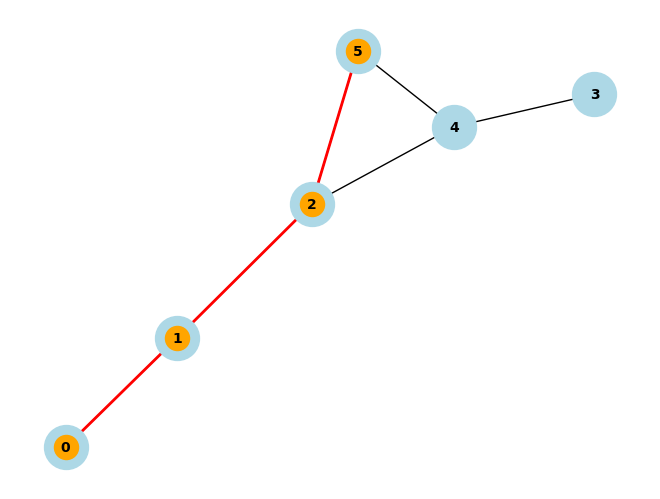

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
class Graph:
    def __init__(self, graph_dict=None):
        if graph_dict is None:
            graph_dict = {}
        self.graph_dict = graph_dict

    def vertices(self):
        return list(self.graph_dict.keys())

    def edges(self):
        return self.generate_edges()

    def add_vertex(self, vertex):
        if vertex not in self.graph_dict:
            self.graph_dict[vertex] = []

    def add_edge(self, edge):
        vertex1, vertex2 = tuple(edge)
        # Add both directions since it's an undirected graph
        if vertex1 in self.graph_dict:
            if vertex2 not in self.graph_dict[vertex1]:
                self.graph_dict[vertex1].append(vertex2)
        else:
            self.graph_dict[vertex1] = [vertex2]

        if vertex2 in self.graph_dict:
            if vertex1 not in self.graph_dict[vertex2]:
                self.graph_dict[vertex2].append(vertex1)
        else:
            self.graph_dict[vertex2] = [vertex1]

    def generate_edges(self):
        edges = []
        for vertex in self.graph_dict:
            for neighbor in self.graph_dict[vertex]:
                if {neighbor, vertex} not in edges:
                    edges.append({vertex, neighbor})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.generate_edges():
            res += str(edge) + " "
        return res


def depth_first_search(graph, start, goal):
    if start not in graph.graph_dict or goal not in graph.graph_dict:
        return []

    stack = [(start, [start])]
    visited = set()

    while stack:
        vertex, path = stack.pop()

        if vertex == goal:
            return path

        if vertex not in visited:
            visited.add(vertex)
            for neighbor in reversed(graph.graph_dict[vertex]):
                if neighbor not in visited:
                    new_path = path + [neighbor]
                    stack.append((neighbor, new_path))

    return []


def visualize_graph(graph, path):
    G = nx.Graph()
    for vertex in graph.graph_dict:
        for neighbor in graph.graph_dict[vertex]:
            G.add_edge(vertex, neighbor)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=1000, font_size=10, font_weight='bold')

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, 
                             edge_color='r', width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path, 
                             node_color='orange')

    plt.show()


def main():
    v = int(input("Enter number of vertices: "))
    e = int(input("Enter number of edges: "))

    graph_dict = {}
    for i in range(v):
        graph_dict[str(i)] = []

    graph = Graph(graph_dict)
    print("Enter edges (space-separated vertices), one edge per line:")
    for i in range(e):
        u, v = input().split()
        graph.add_edge({u, v})

    start = input("Enter start vertex: ")
    goal = input("Enter goal vertex: ")

    path = depth_first_search(graph, start, goal)
    if path:
        print("Path:", ' -> '.join(path))
    else:
        print("No path found!")

    visualize_graph(graph, path)


if __name__ == "__main__":
    main()
# 5
# 6
# 0 1
# 1 2
# 2 4
# 2 5
# 3 4
# 4 5

# BFS

Enter edges (space-separated vertices), one edge per line:
Path: 0 -> 1 -> 2 -> 5


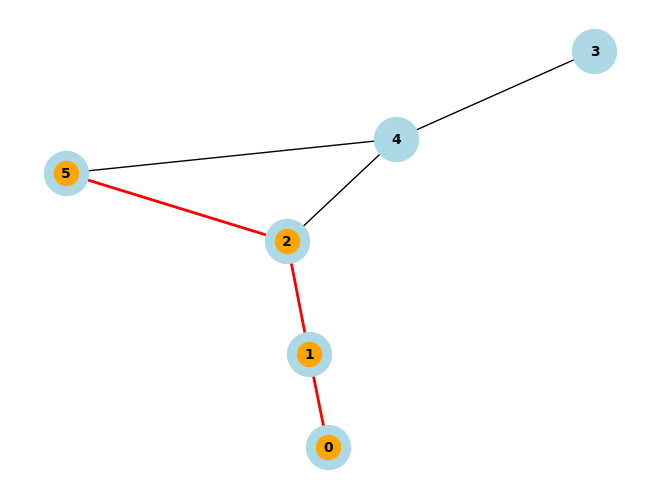

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class Graph:
    def __init__(self, graph_dict=None):
        if graph_dict is None:
            graph_dict = {}
        self.graph_dict = graph_dict

    def vertices(self):
        return list(self.graph_dict.keys())

    def edges(self):
        return self.generate_edges()

    def add_vertex(self, vertex):
        if vertex not in self.graph_dict:
            self.graph_dict[vertex] = []

    def add_edge(self, edge):
        vertex1, vertex2 = tuple(edge)
        # Add both directions since it's an undirected graph
        if vertex1 in self.graph_dict:
            if vertex2 not in self.graph_dict[vertex1]:
                self.graph_dict[vertex1].append(vertex2)
        else:
            self.graph_dict[vertex1] = [vertex2]
            
        if vertex2 in self.graph_dict:
            if vertex1 not in self.graph_dict[vertex2]:
                self.graph_dict[vertex2].append(vertex1)
        else:
            self.graph_dict[vertex2] = [vertex1]

    def generate_edges(self):
        edges = []
        for vertex in self.graph_dict:
            for neighbor in self.graph_dict[vertex]:
                if {neighbor, vertex} not in edges:
                    edges.append({vertex, neighbor})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.generate_edges():
            res += str(edge) + " "
        return res

def breadth_first_search(graph, start, goal):
    if start not in graph.graph_dict or goal not in graph.graph_dict:
        return []

    queue = deque([(start, [start])])
    visited = set()

    while queue:
        vertex, path = queue.popleft()
        
        if vertex == goal:
            return path
            
        if vertex not in visited:
            visited.add(vertex)
            
            for neighbor in graph.graph_dict[vertex]:
                if neighbor not in visited:
                    new_path = path + [neighbor]
                    queue.append((neighbor, new_path))
    
    return []

def visualize_graph(graph, path):
    G = nx.Graph()
    for vertex in graph.graph_dict:
        for neighbor in graph.graph_dict[vertex]:
            G.add_edge(vertex, neighbor)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=1000, font_size=10, font_weight='bold')

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, 
                             edge_color='r', width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path, 
                             node_color='orange')

    plt.show()

def main():
    v = int(input("Enter number of vertices: "))
    e = int(input("Enter number of edges: "))
    graph_dict = {}
    for i in range(v):
        graph_dict[str(i)] = []
    graph = Graph(graph_dict)
    print("Enter edges (space-separated vertices), one edge per line:")
    for i in range(e):
        u, v = input().split()
        graph.add_edge({u, v})
    start = input("Enter start vertex: ")
    goal = input("Enter goal vertex: ")
    path = breadth_first_search(graph, start, goal)
    if path:
        print("Path:", ' -> '.join(path))
    else:
        print("No path found!")

    visualize_graph(graph, path)

if __name__ == "__main__":
    main()

# Water Jug using BFS

In [8]:
from collections import deque
class state:
    def __init__(self, jug1, jug2):
        self.jug1 = jug1
        self.jug2 = jug2
    def __str__(self):
        return "({}, {})".format(self.jug1, self.jug2)
    def __eq__(self, other):
        return self.jug1 == other.jug1 and self.jug2 == other.jug2
    def __hash__(self):
        return hash((self.jug1, self.jug2))
    def fill_jug1(self, capacity1):
        return state(capacity1, self.jug2)
    def fill_jug2(self, capacity2):
        return state(self.jug1, capacity2)
    def empty_jug1(self):
        return state(0, self.jug2)
    def empty_jug2(self):
        return state(self.jug1, 0)
    def pour_jug1_to_jug2(self, capacity2):
        pour_amount = min(self.jug1, capacity2 - self.jug2)
        return state(self.jug1 - pour_amount, self.jug2 + pour_amount)
    def pour_jug2_to_jug1(self, capacity1):
        pour_amount = min(self.jug2, capacity1 - self.jug1)
        return state(self.jug1 + pour_amount, self.jug2 - pour_amount)
def water_jug(capacity1, capacity2, target):
    start = state(0, 0)
    if start.jug2 == target:
        return [start]
    visited = set()
    queue = deque([start])
    visited.add(start)
    parent = {start: None}
    paths=[]
    while queue:
        current = queue.popleft()
        for next_state in [current.fill_jug1(capacity1), current.fill_jug2(capacity2), current.empty_jug1(), current.empty_jug2(), current.pour_jug1_to_jug2(capacity2), current.pour_jug2_to_jug1(capacity1)]:
            if next_state in visited:
                continue
            queue.append(next_state)
            visited.add(next_state)
            parent[next_state] = current
            if next_state.jug2 == target or next_state.jug1==target:
                path = []
                while next_state:
                    path.append(next_state)
                    next_state = parent[next_state]
                paths.append(path[::-1])
    return paths
def main():
    capacity1 = int(input("Enter capacity 1: "))
    capacity2 = int(input("Enter capacity 2: "))
    target = int(input("Enter target: "))
    result = water_jug(capacity1, capacity2, target)
    
    for path in result:
        for state in path:
            print(state, end=" -> ")
        print()
    # if result:
    #     for state in result:
    #         print(state)
    # else:
    #     print("No solution")
if __name__ == "__main__":
    main()

(0, 0) -> (3, 0) -> (0, 3) -> (3, 3) -> (2, 4) -> 
(0, 0) -> (3, 0) -> (0, 3) -> (3, 3) -> (2, 4) -> (2, 0) -> 
(0, 0) -> (3, 0) -> (0, 3) -> (3, 3) -> (2, 4) -> (2, 0) -> (0, 2) -> 
(0, 0) -> (0, 4) -> (3, 1) -> (0, 1) -> (1, 0) -> (1, 4) -> (3, 2) -> 


# Water Jug using DFS

In [1]:
from collections import deque
class state:
    def __init__(self, jug1, jug2):
        self.jug1 = jug1
        self.jug2 = jug2
    def __str__(self):
        return "({}, {})".format(self.jug1, self.jug2)
    def __eq__(self, other):
        return self.jug1 == other.jug1 and self.jug2 == other.jug2
    def __hash__(self):
        return hash((self.jug1, self.jug2))
    def fill_jug1(self, capacity1):
        return state(capacity1, self.jug2)
    def fill_jug2(self, capacity2):
        return state(self.jug1, capacity2)
    def empty_jug1(self):
        return state(0, self.jug2)
    def empty_jug2(self):
        return state(self.jug1, 0)
    def pour_jug1_to_jug2(self, capacity2):
        pour_amount = min(self.jug1, capacity2 - self.jug2)
        return state(self.jug1 - pour_amount, self.jug2 + pour_amount)
    def pour_jug2_to_jug1(self, capacity1):
        pour_amount = min(self.jug2, capacity1 - self.jug1)
        return state(self.jug1 + pour_amount, self.jug2 - pour_amount)
def water_jug(capacity1, capacity2, target):
    start = state(0, 0)
    if start.jug2 == target or start.jug1==target:
        return [start]
    visited = set()
    stack = [start]
    visited.add(start)
    paths=[]
    parent = {start:None}
    while stack:
        current = stack.pop()
        for next_state in [current.fill_jug1(capacity1),current
                           .fill_jug2(capacity2),current.empty_jug1(),current.empty_jug2(),current.pour_jug1_to_jug2(capacity2),current.pour_jug2_to_jug1(capacity1)]:
            if next_state in visited:
                continue
            stack.append(next_state)
            visited.add(next_state)
            parent[next_state]=current
            if next_state.jug2 == target or next_state.jug1==target:
                path = []
                while next_state:
                    path.append(next_state)
                    next_state = parent[next_state]
                paths.append(path[::-1])
            
    return paths
def main():
    capacity1 = int(input("Enter capacity 1: "))
    capacity2 = int(input("Enter capacity 2: "))
    target = int(input("Enter target: "))
    result = water_jug(capacity1, capacity2, target)
    if len(result)>0:
        print("All Possible Solution Paths:")
        for path in result:
            for state in path:
                if state == path[len(path)-1]:
                    print(state)
                    continue
                print(state, end=" -> ")
            print()
    else:
        print("No Solution exists!")
if __name__ == "__main__":
    main()

(0, 0) -> (0, 4) -> (3, 1) -> (0, 1) -> (1, 0) -> (1, 4) -> (3, 2) -> 
(0, 0) -> (0, 4) -> (3, 1) -> (0, 1) -> (1, 0) -> (1, 4) -> (3, 2) -> (0, 2) -> 
(0, 0) -> (0, 4) -> (3, 1) -> (0, 1) -> (1, 0) -> (1, 4) -> (3, 2) -> (0, 2) -> (2, 0) -> 
(0, 0) -> (0, 4) -> (3, 1) -> (0, 1) -> (1, 0) -> (1, 4) -> (3, 2) -> (0, 2) -> (2, 0) -> (2, 4) -> 


# Missionaries and Cannibals using BFS

In [28]:
from collections import deque

class State:
    def __init__(self, m, c, b, parent=None):
        self.m = m 
        self.c = c  
        self.b = b  
        self.parent = parent  

    def is_valid(self):
        if self.m < 0 or self.c < 0 or self.m > 3 or self.c > 3:
            return False
        if (0 < self.m < self.c) or (0 < 3 - self.m < 3 - self.c):
            return False
        return True

    def is_goal(self):
        return self.m == 0 and self.c == 0 and self.b == 0

    def __eq__(self, other):
        return self.m == other.m and self.c == other.c and self.b == other.b

    def __hash__(self):
        return hash((self.m, self.c, self.b))

    def __str__(self):
        return f"M: {self.m}, C: {self.c}, B: {self.b}"

def new_states(current_state):
    successors = []
    moves = [(1, 0), (2, 0), (0, 1), (0, 2), (1, 1)]  

    for m, c in moves:
        if current_state.b == 1:  
            new_state = State(current_state.m - m, current_state.c - c, 0, current_state)
        else:  
            new_state = State(current_state.m + m, current_state.c + c, 1, current_state)

        if new_state.is_valid():
            successors.append(new_state)

    return successors

def bfs():
    start = State(3, 3, 1)
    queue = deque([[start]])  
    solutions = []

    while queue:
        path = queue.popleft()
        current_state = path[-1]  

        if current_state.is_goal():
            solutions.append(path)
            continue  

        for new_state in new_states(current_state):
            if new_state not in path:  
                queue.append(path + [new_state])  

    return solutions  

def main():
    solutions = bfs()
    if len(solutions) == 0:
        print("No solution found")
    else:
        print(f"Total solutions: {len(solutions)}\n")
        for idx, path in enumerate(solutions, 1):
            print(f"Solution {idx}:")
            print("Left side:\tRight side:")
            print(" M  C  B\t\t M  C  B")
            for state in path:
                left_side = f"({state.m}, {state.c}, {state.b})"
                right_side = f"({3 - state.m}, {3 - state.c}, {1 - state.b})"
                print(f"{left_side}\t\t{right_side}")
            print("\n")

if __name__ == '__main__':
    main()


Total solutions: 4

Solution 1:
Left side:	Right side:
 M  C  B		 M  C  B
(3, 3, 1)		(0, 0, 0)
(3, 1, 0)		(0, 2, 1)
(3, 2, 1)		(0, 1, 0)
(3, 0, 0)		(0, 3, 1)
(3, 1, 1)		(0, 2, 0)
(1, 1, 0)		(2, 2, 1)
(2, 2, 1)		(1, 1, 0)
(0, 2, 0)		(3, 1, 1)
(0, 3, 1)		(3, 0, 0)
(0, 1, 0)		(3, 2, 1)
(1, 1, 1)		(2, 2, 0)
(0, 0, 0)		(3, 3, 1)


Solution 2:
Left side:	Right side:
 M  C  B		 M  C  B
(3, 3, 1)		(0, 0, 0)
(3, 1, 0)		(0, 2, 1)
(3, 2, 1)		(0, 1, 0)
(3, 0, 0)		(0, 3, 1)
(3, 1, 1)		(0, 2, 0)
(1, 1, 0)		(2, 2, 1)
(2, 2, 1)		(1, 1, 0)
(0, 2, 0)		(3, 1, 1)
(0, 3, 1)		(3, 0, 0)
(0, 1, 0)		(3, 2, 1)
(0, 2, 1)		(3, 1, 0)
(0, 0, 0)		(3, 3, 1)


Solution 3:
Left side:	Right side:
 M  C  B		 M  C  B
(3, 3, 1)		(0, 0, 0)
(2, 2, 0)		(1, 1, 1)
(3, 2, 1)		(0, 1, 0)
(3, 0, 0)		(0, 3, 1)
(3, 1, 1)		(0, 2, 0)
(1, 1, 0)		(2, 2, 1)
(2, 2, 1)		(1, 1, 0)
(0, 2, 0)		(3, 1, 1)
(0, 3, 1)		(3, 0, 0)
(0, 1, 0)		(3, 2, 1)
(1, 1, 1)		(2, 2, 0)
(0, 0, 0)		(3, 3, 1)


Solution 4:
Left side:	Right side:
 M  C  B		 M  C  B
(3

# Best First Search

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq

class Graph:
    def __init__(self, graph_dict=None):
        if graph_dict is None:
            graph_dict = {}
        self.graph_dict = graph_dict

    def vertices(self):
        return list(self.graph_dict.keys())

    def edges(self):
        return self.generate_edges()

    def add_vertex(self, vertex):
        if vertex not in self.graph_dict:
            self.graph_dict[vertex] = []

    def add_edge(self, edge):
        vertex1, vertex2 = tuple(edge)
        # Add both directions since it's an undirected graph
        if vertex1 in self.graph_dict:
            if vertex2 not in self.graph_dict[vertex1]:
                self.graph_dict[vertex1].append(vertex2)
        else:
            self.graph_dict[vertex1] = [vertex2]

        if vertex2 in self.graph_dict:
            if vertex1 not in self.graph_dict[vertex2]:
                self.graph_dict[vertex2].append(vertex1)
        else:
            self.graph_dict[vertex2] = [vertex1]

    def generate_edges(self):
        edges = []
        for vertex in self.graph_dict:
            for neighbor in self.graph_dict[vertex]:
                if {neighbor, vertex} not in edges:
                    edges.append({vertex, neighbor})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.generate_edges():
            res += str(edge) + " "
        return res

def best_first_search(graph, start, goal, heuristic):
    """
    Best First Search (Greedy) uses a priority queue to always expand the vertex
    with the lowest heuristic value first.
    
    Parameters:
        graph: Graph object.
        start: Starting vertex.
        goal: Goal vertex.
        heuristic: Dictionary mapping vertices to heuristic cost values.
        
    Returns:
        path: List of vertices from start to goal if path exists; otherwise, [].
    """
    if start not in graph.graph_dict or goal not in graph.graph_dict:
        return []
    
    # Priority queue: (heuristic, current vertex, path taken so far)
    pq = []
    heapq.heappush(pq, (heuristic[start], start, [start]))
    
    visited = set()
    
    while pq:
        current_h, current_vertex, path = heapq.heappop(pq)
        
        # Check if we have reached the goal
        if current_vertex == goal:
            return path
        
        # Mark the current vertex as visited
        if current_vertex in visited:
            continue
        visited.add(current_vertex)
        
        # Expand all neighbors
        for neighbor in graph.graph_dict[current_vertex]:
            if neighbor not in visited:
                # Push neighbor with its heuristic value into the priority queue
                new_path = path + [neighbor]
                heapq.heappush(pq, (heuristic.get(neighbor, float('inf')), neighbor, new_path))
    
    return []

def visualize_graph(graph, path):
    G = nx.Graph()
    for vertex in graph.graph_dict:
        for neighbor in graph.graph_dict[vertex]:
            G.add_edge(vertex, neighbor)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=1000, font_size=10, font_weight='bold')

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, 
                             edge_color='r', width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path, 
                             node_color='orange')

    plt.show()

def main():
    # Input number of vertices and edges.
    v = int(input("Enter number of vertices: "))
    e = int(input("Enter number of edges: "))

    graph_dict = {}
    for i in range(v):
        graph_dict[str(i)] = []

    graph = Graph(graph_dict)
    print("Enter edges (space-separated vertices), one edge per line:")
    for i in range(e):
        u, w = input().split()
        # Use a set to add edge; Graph.add_edge expects a set/tuple.
        graph.add_edge({u, w})

    start = input("Enter start vertex: ")
    goal = input("Enter goal vertex: ")

    # Define a heuristic dictionary.
    # For demonstration, assign random (or pre-defined) heuristic values.
    # Lower values are considered closer to the goal.
    # You should customize these values based on your specific problem.
    heuristic = {}
    print("Enter heuristic values for each vertex:")
    for vertex in graph.vertices():
        # Here, we assume user inputs a number for each vertex.
        heuristic[vertex] = float(input(f"Heuristic for vertex {vertex}: "))

    path = best_first_search(graph, start, goal, heuristic)
    if path:
        print("Path found:", ' -> '.join(path))
    else:
        print("No path found!")

    visualize_graph(graph, path)

if __name__ == "__main__":
    main()


Enter edges (space-separated vertices), one edge per line:


KeyboardInterrupt: Interrupted by user

In [ ]:
0 1
0 2
0 3
1 4
1 5
2 6
2 7
3 8
8 9
8 10
9 11
9 12
9 13